In [1]:
import copy
import sys
sys.path.insert(0, "..")
from classes.atoms import Atom, Atom_Collection, PBC_handler
from classes.calculators.lennardjones import LennardJones
import numpy as np
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

In [2]:
pos_flat = np.loadtxt('../Week4/lj10clusters.txt')
positions = pos_flat.reshape(-1,pos_flat.shape[1]//2,2)[3]
atom_list = [Atom(position=pos, size=20) for pos in positions+np.array([5.0,6.0])]
unit_cell = (np.array([10.0,0]), np.array([0.0,10.0]))
atom_col_no_per = Atom_Collection(atomlist=atom_list, unit_cell=unit_cell)
atom_col_no_per.calculator = LennardJones()
atom_list = [Atom(position=pos, size=20) for pos in positions+np.array([10.0,11.0])]
atom_col_per = Atom_Collection(atomlist=atom_list, unit_cell=unit_cell, pbc=True)
atom_col_per.calculator = LennardJones()

NOTE VECTORS SUPPLIED ALSO HAVE TO BE ORDERED, so (v1 --> [L,0]) and (v2 --> [0,L])


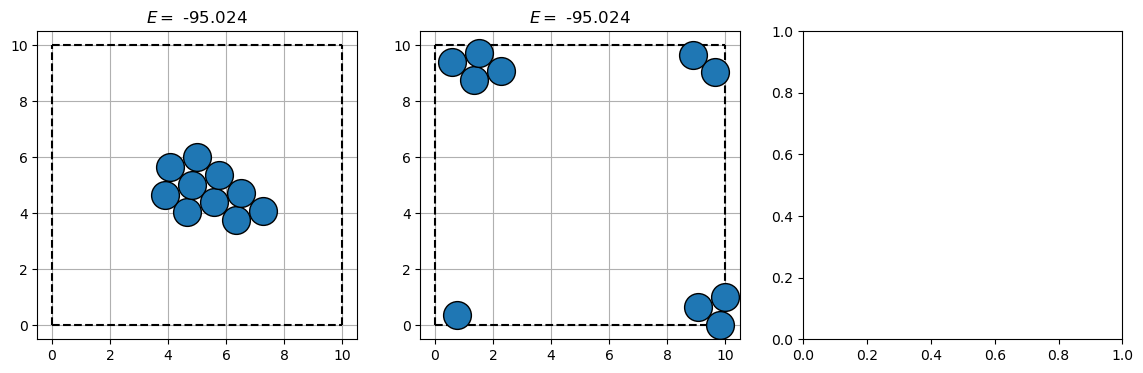

In [3]:
fig, axs = plt.subplots(1,3, figsize=(14,4))
atom_cols = [atom_col_no_per, atom_col_per]
for ax, atom_col in zip(axs, atom_cols):
    ax.grid()
    ax.set_xlim([-0.5,10.5])
    ax.set_ylim([-0.5,10.5])
    atom_col.plot(ax=ax, plot_cell=True)
    atom_col.reset_plot_axes()
    ax.set_title(rf"$E=$ {atom_col.get_potential_energy().round(3)}")